# Анализ модных трендов зимы

### **А. Загрузка и первичный обзор**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Загрузка данных
df = pd.read_csv("Winter_Fashion_Trends_Dataset.csv")

#Первые строки
df.head()

#Последние строки
df.tail()

#Общая информация о датасете
df.info()

#Проверка типов данных
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                150 non-null    int64  
 1   Brand             150 non-null    object 
 2   Category          150 non-null    object 
 3   Color             150 non-null    object 
 4   Material          150 non-null    object 
 5   Style             150 non-null    object 
 6   Gender            150 non-null    object 
 7   Season            150 non-null    object 
 8   Price(USD)        150 non-null    float64
 9   Popularity_Score  150 non-null    float64
 10  Customer_Rating   150 non-null    float64
 11  Trend_Status      150 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.2+ KB


,0
ID,int64
Brand,object
Category,object
Color,object
Material,object
Style,object
Gender,object
Season,object
Price(USD),float64
Popularity_Score,float64


Типы данных корректны

### **В. Обработка данных**

In [ ]:
#Поиск пропусков
df.isnull().sum()

,0
ID,0
Brand,0
Category,0
Color,0
Material,0
Style,0
Gender,0
Season,0
Price(USD),0
Popularity_Score,0


In [ ]:
numeric_cols = ['Price(USD)', 'Popularity_Score', 'Customer_Rating']
categorical_cols = ['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 'Season', 'Trend_Status']

#Заполнение числовых столбцов медианой
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

#Заполнение категориальных столбцов модой
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Заметим, что NaN'ы пропали после заполнения модой

In [ ]:
# Поиск дубликатов
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 0


In [ ]:
#Поиск и удаление выбросов
from scipy.stats import zscore
z_scores = np.abs(zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

### **С. Графики**

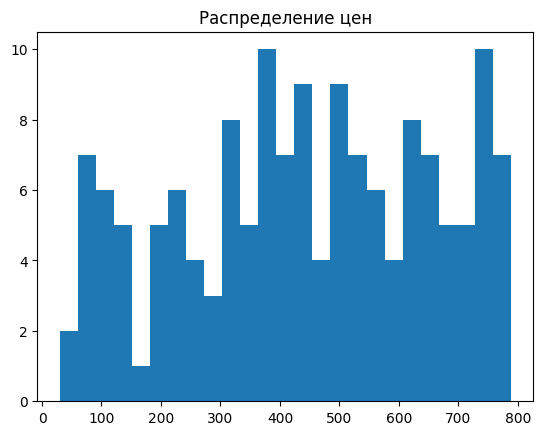

In [ ]:
plt.figure()
plt.hist(df['Price(USD)'], bins=25)
plt.title("Распределение цен")
plt.show()

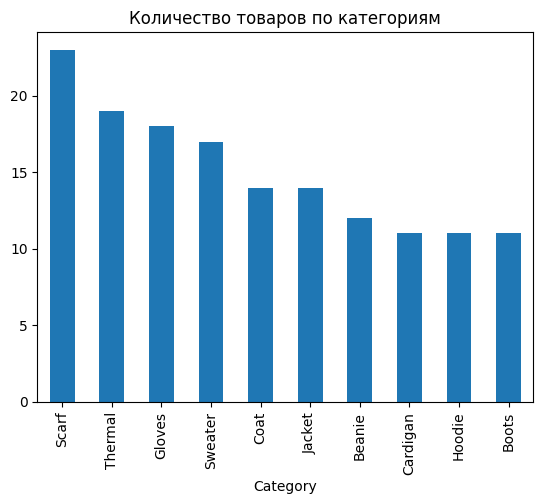

In [ ]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Количество товаров по категориям")
plt.show()

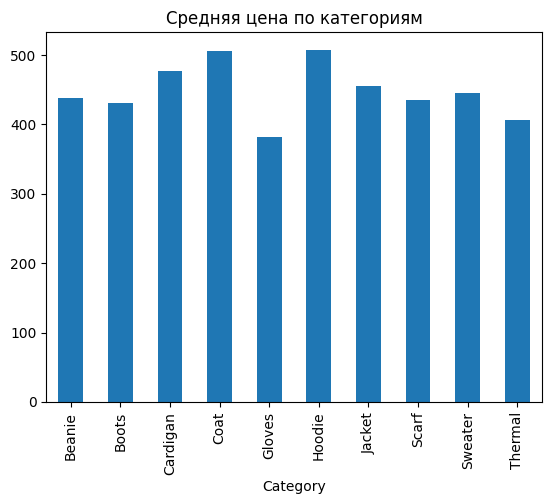

In [ ]:
df.groupby('Category')['Price(USD)'].mean().plot(kind='bar')
plt.title("Средняя цена по категориям")
plt.show()

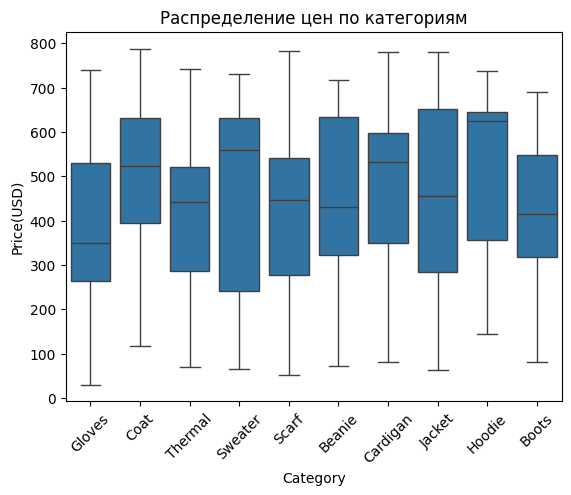

In [ ]:
sns.boxplot(x='Category', y='Price(USD)', data=df)
plt.title("Распределение цен по категориям")
plt.xticks(rotation=45)
plt.show()

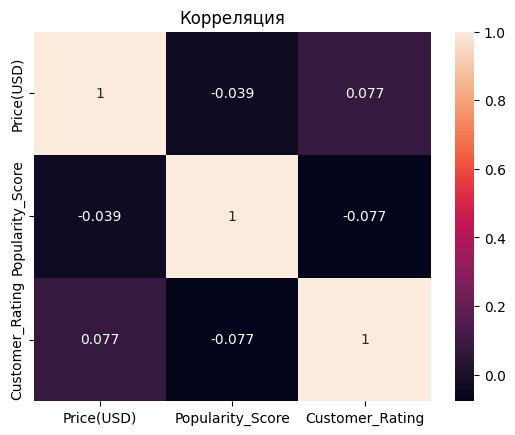

In [ ]:
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.title("Корреляция")
plt.show()

### **D. Группировки и агрегации**

In [ ]:
#Таблица со средними ценами
df.groupby('Season')['Price(USD)'].mean()

,Price(USD)
Season,
Winter 2023,428.960714
Winter 2024,418.965385
Winter 2025,476.131071


In [ ]:
#Средние баллы популярности
df.groupby('Trend_Status')['Popularity_Score'].mean()

,Popularity_Score
Trend_Status,
Classic,5.042857
Emerging,5.910000
Outdated,6.164000
Trending,5.661905


In [ ]:
#Средние рейтинги по категориям и гендеру
pd.pivot_table(
    df,
    values='Customer_Rating',
    index='Category',
    columns='Gender',
    aggfunc='mean'
)

Gender,Men,Unisex,Women
Category,,,
Beanie,3.766667,2.800000,4.157143
Boots,3.575000,3.040000,4.000000
Cardigan,3.225000,3.633333,4.175000
Coat,3.433333,3.800000,4.750000
Gloves,3.440000,3.650000,4.328571
Hoodie,3.300000,4.600000,3.571429
Jacket,4.075000,4.316667,4.100000
Scarf,3.733333,3.870000,3.585714
Sweater,3.866667,4.120000,3.600000
